# Cutting through data in $Q$ and $E$

After the initial viewing of the data acquired through the [Viewer3D](QuickPlottingofData.html) the next step is to perform cuts. Normally, what is wanted is the intensity measured as a function of $\vec{Q}$ and energy in a 2D plot along a specified direction through space. Often these are specified using the RLU units and questions about the number neutrons hitting a point or if one actually has covered reciprocal space in such a fasion that an article picture can be generated. All of this can be check through the use of the <code>plotCutQELine</code> method as shown below. This method creates a dedicated axis element (and figure if needed) containing the intensity as function of position in $\vec{Q}$ and energy with a given width, certain height in energy and a minimum pixel size along the $\vec{Q}$ direction. As indicated by the name, one can provide a list of $\vec{Q}$ points to be visited, with the only restriction that they should contain data and that they are connected. That is, providing three positions results in a plot with two segments connecting point 1 and 2 as well as 2 and 3.

In [1]:
%matplotlib inline
from MJOLNIR.Data import DataSet
from MJOLNIR import _tools # Usefull tools useful across MJOLNIR
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['figure.dpi'] = 200

numbers = '483-489,494-500' # String of data numbers
fileList = _tools.fileListGenerator(numbers,r'C:\Users\lass_j\Documents\CAMEA2018',2018) # Create file list from 2018 in specified folder

ds = DataSet.DataSet(fileList)
ds.convertDataFile(saveFile=False)

In this example a cut is made through reciprocal space between the following 5 points:

- (0,0,0)
- (0,0,1)
- (-1,0,1)
- (-1,0,0)
- (0,0,1)


In [2]:
# Define the positions to be cut through
Q1 = np.array([0,0,0])
Q2 = np.array([0,0,1])
Q3 = np.array([-1,0,1])
Q4 = np.array([-1,0,0])
Q5 = np.array([0,0,1])
# Collect them into one array
QPoints = np.array([Q1,Q2,Q3,Q4,Q5])

As for any cut in MJOLNIR, the width and the size of the bin along the cut direction is to be provided. For this cutting method these are called <code>width</code> and <code>minPixel</code>, respectively. Both of these values are to be provided in units of 1/AA.
Additionally, the 'vertical' size of the bin, i.e. the energy direction, is also to be provided. In the this initial case the bins are to be of equal size and a total of 31 bins are wanted.

In [3]:
# Define orthogonal width and minimum pixel size along Q-cut
width = 0.05 # 1/AA
minPixel = 0.01 # 1/AA

# Define energy bins
EMin,EMax = ds.energy.min(), ds.energy.max()
EnergyBins = np.linspace(EMin,EMax,31)

Now all that remains is to invoke the <code>plotCutQELine</code>, which internally calls <code>cutQELine</code> and generates a suitable axis into which the data are plotted.

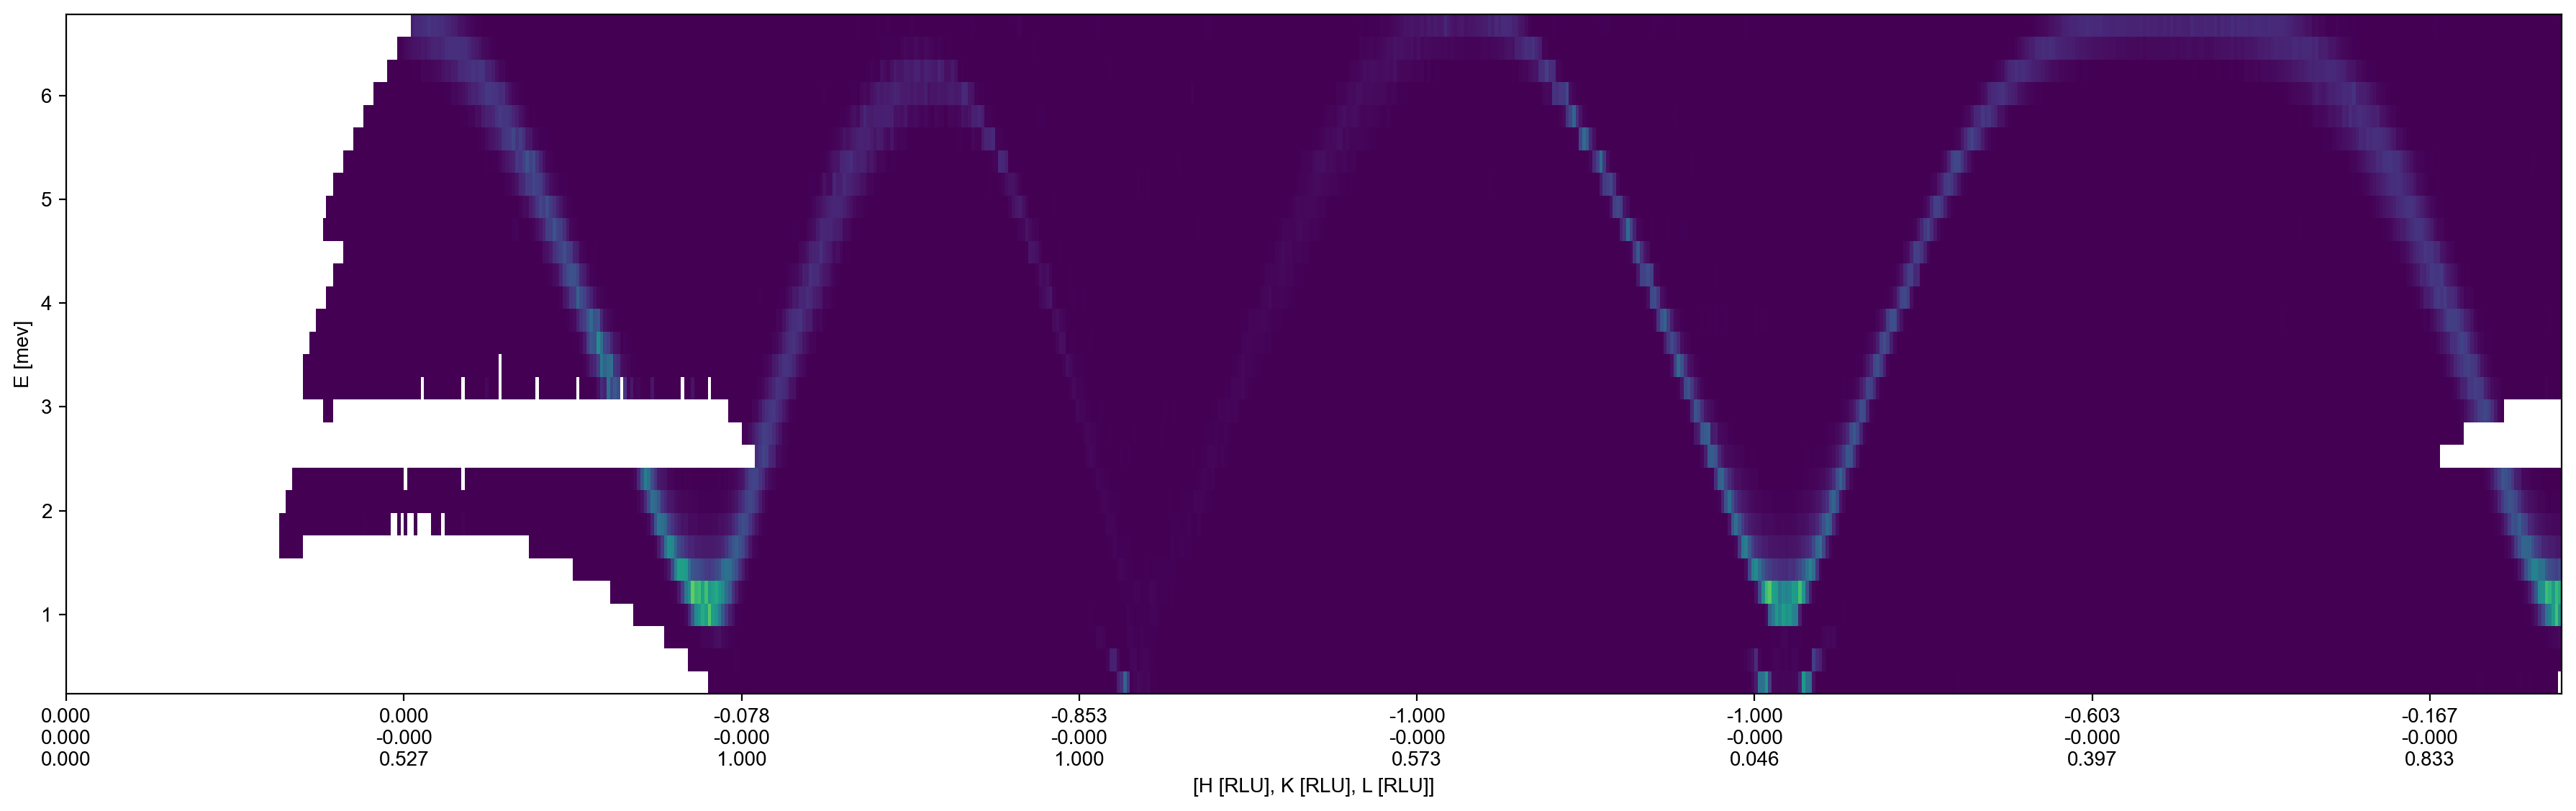

In [4]:
ax,DataLists,Bins = \
ds.plotCutQELine(QPoints=QPoints, width=width, minPixel=minPixel, \
                 EnergyBins=EnergyBins)

# Change the colorbar of the plot
ax.set_clim(0,2e-5)
ax.get_figure()

With the above code the 2D cut through the MnF2 data set has been done. Is this performed in an interactive python version using the mouse allows for further study of the data. Hovering over a given pixel reveals the position as well as the intensity. Further, clicking (with the pointer) prints the position, intensity, and specific informations about how many neutron counts (cts), total normalization (Norm), total monitor (Mon), and pixels binned together (NormCount) in that bin. Many further tweaks are possible through the use of kwargs as explained in the Advanced plotCutQELine tutorial.